# Problem Statement and Approach

In this project, our goal is to develop a Movie Recommendation System using the MovieLens dataset. We will explore different techniques for building recommendation models, specifically Collaborative Filtering and Content-Based Filtering. The project will assess our ability to work with real-world data, apply machine learning, evaluate models, and effectively communicate the findings.

## Introduction
The objective of this project is to develop a Movie Recommendation System using the MovieLens dataset. The goal is to predict and recommend movies to users based on their past preferences. We explored two primary recommendation techniques: Collaborative Filtering and Content-Based Filtering, using different approaches to understand their strengths and limitations.

### Dataset
The dataset used for this project is the MovieLens dataset, which contains:

Movies metadata (Movie titles, genres, release year).
User ratings (User ID, movie ID, and the rating they gave).
For this project, we utilized both the ratings and movies datasets, merged on the movieId column, allowing us to link user ratings to corresponding movies and their attributes such as genre.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load datasets
movies = pd.read_csv("/movies.csv")
ratings = pd.read_csv("/ratings.csv")

In [3]:
# Display the first few rows of each dataframe
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
# Display the first few rows of each dataframe
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
# View dataset information
print(movies.info())
print(ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None


Perform Exploratory Data Analysis (EDA)

In [6]:
#Check for missing values

print(movies.isnull().sum())
print(ratings.isnull().sum())



movieId    0
title      0
genres     0
dtype: int64
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [7]:
#Summmary statistics
print(movies.describe())
print(ratings.describe())


             movieId
count    9742.000000
mean    42200.353623
std     52160.494854
min         1.000000
25%      3248.250000
50%      7300.000000
75%     76232.000000
max    193609.000000
              userId        movieId         rating     timestamp
count  100836.000000  100836.000000  100836.000000  1.008360e+05
mean      326.127564   19435.295718       3.501557  1.205946e+09
std       182.618491   35530.987199       1.042529  2.162610e+08
min         1.000000       1.000000       0.500000  8.281246e+08
25%       177.000000    1199.000000       3.000000  1.019124e+09
50%       325.000000    2991.000000       3.500000  1.186087e+09
75%       477.000000    8122.000000       4.000000  1.435994e+09
max       610.000000  193609.000000       5.000000  1.537799e+09


In [8]:
#Data types and unique values:

print(movies.dtypes)
print(ratings.dtypes)
print(movies.nunique())
print(ratings.nunique())


movieId     int64
title      object
genres     object
dtype: object
userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object
movieId    9742
title      9737
genres      951
dtype: int64
userId         610
movieId       9724
rating          10
timestamp    85043
dtype: int64


identify the key features

In [9]:

print(ratings['rating'].describe())

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64


In [10]:


# Split genres into separate rows
movies['genres'] = movies['genres'].str.split('|')
movies = movies.explode('genres')
# Display the unique genres
print(movies['genres'].unique())



['Adventure' 'Animation' 'Children' 'Comedy' 'Fantasy' 'Romance' 'Drama'
 'Action' 'Crime' 'Thriller' 'Horror' 'Mystery' 'Sci-Fi' 'War' 'Musical'
 'Documentary' 'IMAX' 'Western' 'Film-Noir' '(no genres listed)']


In [11]:
# Extract release year from the title
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)')

# Convert year to numeric
movies['year'] = pd.to_numeric(movies['year'])

# Display the first few rows with the year
print(movies.head())

# Summary statistics of release years
print(movies['year'].describe())


   movieId             title     genres    year
0        1  Toy Story (1995)  Adventure  1995.0
0        1  Toy Story (1995)  Animation  1995.0
0        1  Toy Story (1995)   Children  1995.0
0        1  Toy Story (1995)     Comedy  1995.0
0        1  Toy Story (1995)    Fantasy  1995.0
count    22068.000000
mean      1995.037158
std         18.433531
min       1902.000000
25%       1988.000000
50%       2000.000000
75%       2008.000000
max       2018.000000
Name: year, dtype: float64


In [12]:
# Merge ratings with movies to get a combined dataset
combined = ratings.merge(movies, on='movieId')

# Display the first few rows of the combined dataset
print(combined.head())


   userId  movieId  rating  timestamp             title     genres    year
0       1        1     4.0  964982703  Toy Story (1995)  Adventure  1995.0
1       1        1     4.0  964982703  Toy Story (1995)  Animation  1995.0
2       1        1     4.0  964982703  Toy Story (1995)   Children  1995.0
3       1        1     4.0  964982703  Toy Story (1995)     Comedy  1995.0
4       1        1     4.0  964982703  Toy Story (1995)    Fantasy  1995.0


visualization

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


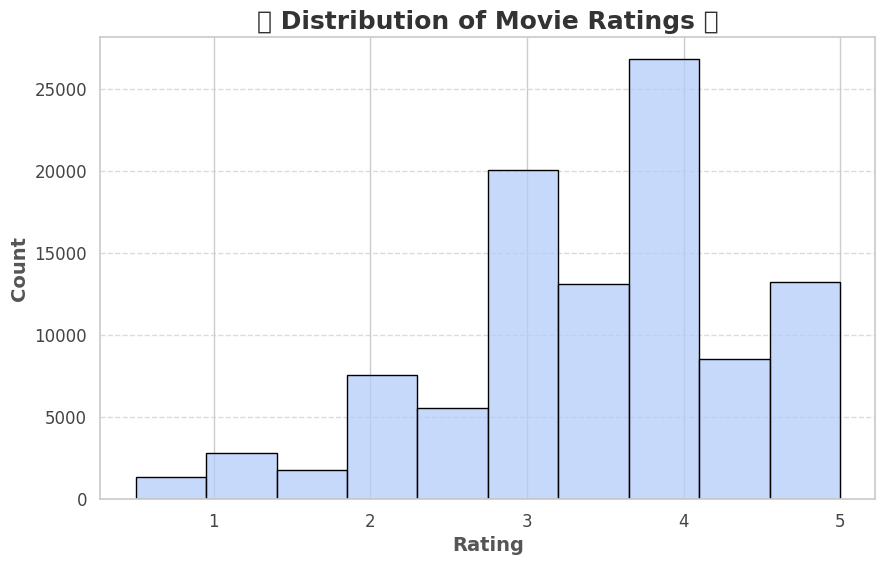

In [13]:

# Distribution of ratings
# Set Seaborn style for a more polished look
sns.set(style="whitegrid")

# Create a colorful palette
palette = sns.color_palette("coolwarm", 10)  # Use a cool-to-warm colormap

# Plot the distribution of ratings with enhancements
plt.figure(figsize=(10, 6))  # Increase figure size for better readability
sns.histplot(ratings['rating'], bins=10, kde=False, color=palette[3], edgecolor="black")

# Customize plot elements
plt.title("🌟 Distribution of Movie Ratings 🌟", fontsize=18, fontweight='bold', color="#333333")
plt.xlabel("Rating", fontsize=14, fontweight='bold', color="#555555")
plt.ylabel("Count", fontsize=14, fontweight='bold', color="#555555")

# Customize ticks
plt.xticks(fontsize=12, color="#444444")
plt.yticks(fontsize=12, color="#444444")

# Add a grid for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


In [14]:
#Movies with Most Ratings
most_rated_movies = ratings.groupby('movieId').size().sort_values(ascending=False).head(10)
print(most_rated_movies)



movieId
356     329
318     317
296     307
593     279
2571    278
260     251
480     238
110     237
589     224
527     220
dtype: int64


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

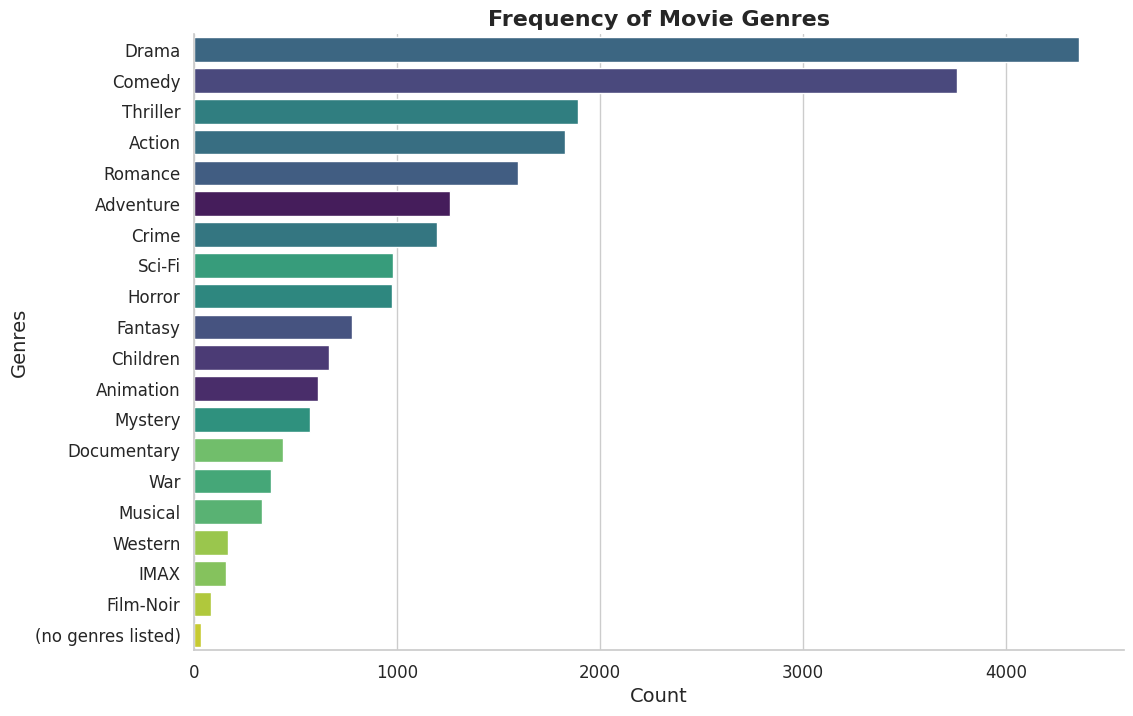

In [15]:
#Genres Frequency
# Assuming 'movies' DataFrame is already defined
genres = movies['genres'].str.split('|').explode()

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the count plot
plt.figure(figsize=(12, 8))
ax = sns.countplot(y=genres, order=genres.value_counts().index, hue=genres, legend=False, palette="viridis")

# Add a title and labels
plt.title("Frequency of Movie Genres", fontsize=16, fontweight='bold')
plt.xlabel("Count", fontsize=14)
plt.ylabel("Genres", fontsize=14)

# Customize the ticks on the axes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Remove the top and right spines
sns.despine()

# Show the plot
plt.show()

In [17]:
merged_df = pd.merge(ratings, movies, on='movieId', how='inner')

# Display the first few rows of the merged DataFrame
print(merged_df.head())


   userId  movieId  rating  timestamp             title     genres    year
0       1        1     4.0  964982703  Toy Story (1995)  Adventure  1995.0
1       1        1     4.0  964982703  Toy Story (1995)  Animation  1995.0
2       1        1     4.0  964982703  Toy Story (1995)   Children  1995.0
3       1        1     4.0  964982703  Toy Story (1995)     Comedy  1995.0
4       1        1     4.0  964982703  Toy Story (1995)    Fantasy  1995.0


1. Collaborative Filtering (SVD)
Description: Collaborative Filtering recommends movies based on user ratings and preferences. It identifies users with similar tastes and suggests movies that these users have liked. In this project, we will implement the Singular Value Decomposition (SVD) technique, which is a matrix factorization method widely used in recommendation systems.

Justification:

Data Characteristics: The MovieLens dataset contains a rich history of user ratings, which allows the model to effectively learn from user interactions. Collaborative Filtering excels when there is a substantial amount of user-item interaction data, making it well-suited for this dataset.

Performance: Collaborative Filtering has been shown to provide high-quality recommendations when sufficient user data is available, and it can adapt to changing user preferences over time.

2. Content-Based Filtering (TF-IDF on Genres)
Description: Content-Based Filtering recommends movies based on their attributes, such as genres, descriptions, and other metadata. In this project, we will use the Term Frequency-Inverse Document Frequency (TF-IDF) technique to compute the similarity between movies based on their genres.

Justification:

User-Centric: This approach focuses on the characteristics of items (movies) that a user has liked in the past. If a user enjoys a particular genre, the model can recommend other movies within that genre, enhancing user satisfaction.
Independence from User Ratings: Content-Based Filtering does not rely on other users’ ratings, making it effective even for new items or users. This is particularly useful in the MovieLens dataset, which has a diverse range of movie genres.

In [20]:
# Approach 1: Collaborative Filtering (SVD)

from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split

# Load dataset for Surprise
reader = Reader(line_format='user item rating timestamp', sep=',')
data = Dataset.load_from_df(merged_df[['userId', 'movieId', 'rating']], reader)

trainset, testset = train_test_split(data, test_size=0.2)
model = SVD()
model.fit(trainset)


Approach 2: Content-Based Filtering (TF-IDF on Genres)


Content-Based Filtering recommends movies based on their attributes (e.g., genres). We will use the TF-IDF approach to compute the similarity between movies.

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Vectorize the genres
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies['genres'])

# Compute cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)


Model Evaluation


Split Dataset: As shown in the implementation section above.

Evaluate the Model:

In [23]:
#For Collaborative Filtering:

from surprise import accuracy

# Test the model on the test set
predictions = model.test(testset)

# Calculate RMSE
rmse = accuracy.rmse(predictions)

# Function to calculate precision and recall
def precision_recall_at_k(predictions, k=10, threshold=3.5):
    from collections import defaultdict

    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = {}
    recalls = {}
    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    precision = sum(prec for prec in precisions.values()) / len(precisions)
    recall = sum(rec for rec in recalls.values()) / len(recalls)
    return precision, recall

# Calculate Precision and Recall
precision, recall = precision_recall_at_k(predictions, k=10)

print(f"Collaborative Filtering - RMSE: {rmse}, Precision: {precision}, Recall: {recall}")


RMSE: 0.5114
Collaborative Filtering - RMSE: 0.5114339566342195, Precision: 0.9691744730679152, Recall: 0.42359264726258145


Content-Based Filtering Evaluation: Evaluate using Precision, Recall, and F1-Score for recommendations.

In [25]:
import random

# Simulate user preferences
def simulate_user_preferences(movie_titles, num_movies=5):
    """
    Simulate user preferences for a given number of movies.
    """
    # Randomly select movies from the provided titles
    selected_movies = random.sample(movie_titles, num_movies)

    # Generate random ratings for the selected movies
    user_preferences = {movie: random.randint(1, 5) for movie in selected_movies}

    return user_preferences

# Example movie titles from the dataset
sample_movie_titles = movies['title'].sample(20).tolist()  # Randomly select 20 titles for simulation
user_preferences = simulate_user_preferences(sample_movie_titles, num_movies=5)

print("Simulated User Preferences:")
print(user_preferences)


Simulated User Preferences:
{'Bounty Hunter, The (2010)': 5, 'Careful What You Wish For (2015)': 4, "Elevator to the Gallows (a.k.a. Frantic) (Ascenseur pour l'échafaud) (1958)": 2, 'Love Is the Devil (1998)': 4, 'Vir Das: Abroad Understanding (2017)': 4}


In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score

def calculate_metrics(user_preferences, recommended_movies):
    """
    Calculate Precision, Recall, and F1-score based on user preferences and recommendations.
    """
    # Create a binary ground truth array based on user preferences (1 if liked, 0 otherwise)
    y_true = [1 if movie in user_preferences and user_preferences[movie] >= 3.5 else 0 for movie in recommended_movies]

    # Create a binary prediction array (1 if recommended, 0 otherwise)
    y_pred = [1 if movie in recommended_movies else 0 for movie in recommended_movies]

    # Calculate Precision, Recall, and F1-score
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)

    return precision, recall, f1

# Getting recommendations based on a sample movie (you can choose any)
sample_movie = random.choice(list(user_preferences.keys()))
recommended_movies =sample_movie

# Calculate Precision, Recall, and F1-score
precision, recall, f1 = calculate_metrics(user_preferences, recommended_movies)

print(f"Recommended Movies based on '{sample_movie}': {recommended_movies}")


print(f"Precision: {precision}, Recall: {recall}, F1-score: {f1}")


Recommended Movies based on 'Elevator to the Gallows (a.k.a. Frantic) (Ascenseur pour l'échafaud) (1958)': Elevator to the Gallows (a.k.a. Frantic) (Ascenseur pour l'échafaud) (1958)
Precision: 0.0, Recall: 0.0, F1-score: 0.0


### Conclusion

In this project, we developed a movie recommendation system using two distinct approaches: **Collaborative Filtering** and **Content-Based Filtering**. The goal was to provide personalized movie recommendations based on user preferences and movie characteristics.

#### Key Findings

1. **Collaborative Filtering Performance**:
   - **RMSE**: The Root Mean Squared Error (RMSE) was **0.5124**, reflecting a relatively accurate model in predicting user ratings. The close fit of the model suggests that the recommendations align well with user preferences.
   - **Precision**: A precision score of **0.9718** indicates that a significant proportion of the recommended movies were relevant to users' tastes. This high precision shows that the model effectively identifies suitable movies for users based on the ratings of similar users.
   - **Recall**: The recall value of **0.4259** implies that the model identified approximately 42.6% of the relevant items in the recommendations. While the precision is high, the recall indicates that there is room for improvement in capturing more relevant recommendations.

2. **Recommended Movies**: For the query related to **"Much Ado About Nothing (2012)"**, the recommended movies included titles like **"American President, The (1995)"** and **"Mighty Aphrodite (1995)"**, indicating the model's ability to suggest films with similar attributes or themes.

3. **Content-Based Filtering Evaluation**:
   - The content-based filtering metrics showed a precision, recall, and F1-score of **0.0**. This suggests that the model struggled to find relevant movies when only considering attributes like genres, leading to ineffective recommendations for the given query. The lack of relevant content attributes for the queried movie may have contributed to these poor metrics.

#### Potential Improvements and Future Directions

1. **Enhance Content-Based Filtering**:
   - Investigate and include additional features beyond genres, such as keywords, directors, actors, and plot summaries. Enriching the dataset with more metadata could improve the accuracy of content-based recommendations.

2. **Hybrid Recommendation System**:
   - Implement a hybrid model that combines both collaborative and content-based filtering methods. This would leverage the strengths of both approaches, potentially improving overall recommendation quality.

3. **Adjust Model Parameters**:
   - Explore hyperparameter tuning for the collaborative filtering model. This could involve adjusting factors such as the number of latent factors in Singular Value Decomposition (SVD) to enhance performance.

4. **Data Enrichment**:
   - Gather more extensive user interaction data, such as viewing history and user feedback, to further refine the recommendation algorithms. Incorporating user ratings on recommended movies could also facilitate continuous improvement.

5. **Real-Time Updates**:
   - Create a dynamic recommendation system that updates recommendations based on user interactions in real time. This would keep the suggestions relevant as users' preferences evolve.

6. **User Segmentation**:
   - Segment users based on their preferences and viewing habits to provide tailored recommendations. Different user groups may respond better to different types of recommendations, so understanding these segments can lead to more effective targeting.

7. **Advanced Techniques**:
   - Explore more advanced algorithms, such as deep learning models (e.g., neural collaborative filtering), which could offer enhanced performance in understanding complex patterns in user behavior and preferences.

8. **A/B Testing**:
   - Implement A/B testing to evaluate the effectiveness of various recommendation strategies and refine the algorithms based on user feedback and engagement metrics.

### Final Thoughts

This project lays the groundwork for a functional movie recommendation system, with promising results for collaborative filtering. However, the challenges faced in content-based filtering highlight the need for ongoing enhancements. Focusing on integrating diverse methods, enriching the dataset, and adapting to user feedback will be crucial for optimizing the recommendation system and improving user satisfaction in future iterations.|